# 1.0 Full Exploratory Data Analysis

### Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import challenge_alaya.utils.paths as path
import challenge_alaya.visualization.visualize as visualize
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Process data

#### Read data

In [3]:
input_data = path.data_raw_dir("data.csv")

In [4]:
### Cargar los datos ###
df = pd.read_csv(input_data)

In [5]:
# Conocer la forma de los datos
df.shape

(20631, 26)

In [6]:
# Conocer los datos nulos
df.isnull().sum()

unique_id    0
unit_nr      0
setting_1    0
setting_2    0
setting_3    0
s_1          0
s_2          0
s_3          0
s_4          0
s_5          0
s_6          0
s_7          0
s_8          0
s_9          0
s_10         0
s_11         0
s_12         0
s_13         0
s_14         0
s_15         0
s_16         0
s_17         0
s_18         0
s_19         0
s_20         0
s_21         0
dtype: int64

In [7]:
# Conocer el formato de los datos
df.dtypes

unique_id      int64
unit_nr        int64
setting_1    float64
setting_2    float64
setting_3    float64
s_1          float64
s_2          float64
s_3          float64
s_4          float64
s_5          float64
s_6          float64
s_7          float64
s_8          float64
s_9          float64
s_10         float64
s_11         float64
s_12         float64
s_13         float64
s_14         float64
s_15         float64
s_16         float64
s_17           int64
s_18           int64
s_19         float64
s_20         float64
s_21         float64
dtype: object

In [8]:
# Conociendo el conjunto de datos de forma resumida 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  20631 non-null  int64  
 1   unit_nr    20631 non-null  int64  
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   s_1        20631 non-null  float64
 6   s_2        20631 non-null  float64
 7   s_3        20631 non-null  float64
 8   s_4        20631 non-null  float64
 9   s_5        20631 non-null  float64
 10  s_6        20631 non-null  float64
 11  s_7        20631 non-null  float64
 12  s_8        20631 non-null  float64
 13  s_9        20631 non-null  float64
 14  s_10       20631 non-null  float64
 15  s_11       20631 non-null  float64
 16  s_12       20631 non-null  float64
 17  s_13       20631 non-null  float64
 18  s_14       20631 non-null  float64
 19  s_15       20631 non-null  float64
 20  s_16  

In [9]:
# Visualizamos las primeras 5 filas del conjunto de datos
df.head()

,unique_id,unit_nr,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,524,72,0.0020,-0.0001,100.0,518.67,643.66,1606.65,1433.07,14.62,...,519.44,2388.32,8099.94,8.5239,0.03,397,2388,100.0,38.46,22.9674
1,525,72,0.0000,0.0001,100.0,518.67,643.90,1598.73,1436.24,14.62,...,520.18,2388.30,8101.49,8.5229,0.03,395,2388,100.0,38.45,23.0712
2,526,6,0.0014,-0.0004,100.0,518.67,643.47,1600.63,1434.92,14.62,...,518.98,2388.34,8102.82,8.5358,0.03,397,2388,100.0,38.42,22.9577
3,527,72,0.0007,-0.0003,100.0,518.67,643.91,1597.72,1427.84,14.62,...,519.48,2388.36,8103.27,8.5519,0.03,395,2388,100.0,38.46,23.1649
4,528,72,-0.0000,-0.0002,100.0,518.67,643.30,1605.50,1428.53,14.62,...,519.45,2388.30,8103.77,8.5114,0.03,396,2388,100.0,38.39,23.0848


In [10]:
# Visualizamos las últimas 5 filas del conjunto de datos
df.tail()

,unique_id,unit_nr,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
20626,21150,18,-0.0029,-0.0001,100.0,518.67,643.93,1601.00,1428.08,14.62,...,519.44,2388.39,8282.50,8.5132,0.03,398,2388,100.0,38.50,23.0304
20627,21151,51,0.0015,0.0005,100.0,518.67,643.37,1602.44,1432.71,14.62,...,520.36,2388.49,8288.26,8.5117,0.03,398,2388,100.0,38.72,23.0834
20628,21152,9,-0.0016,0.0004,100.0,518.67,644.04,1595.36,1428.43,14.62,...,520.28,2388.56,8289.63,8.5156,0.03,399,2388,100.0,38.45,23.0284
20629,21153,48,-0.0025,-0.0005,100.0,518.67,644.02,1609.54,1435.19,14.62,...,520.53,2388.55,8290.25,8.4923,0.03,398,2388,100.0,38.45,23.0188
20630,21154,51,0.0014,0.0004,100.0,518.67,644.11,1606.60,1428.55,14.62,...,520.20,2388.54,8293.72,8.5306,0.03,397,2388,100.0,38.39,23.0958


#### Explore data

In [11]:
# Estadística descriptiva del conjunto de datos
df.describe()

,unique_id,unit_nr,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,10839.000000,51.506568,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,5955.801038,29.227633,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,524.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,5681.500000,26.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,10839.000000,52.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,15996.500000,77.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,21154.000000,100.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [12]:
df['unit_nr'].value_counts()

69    362
92    341
96    336
67    313
83    293
     ... 
24    147
70    137
57    137
91    135
39    128
Name: unit_nr, Length: 100, dtype: int64

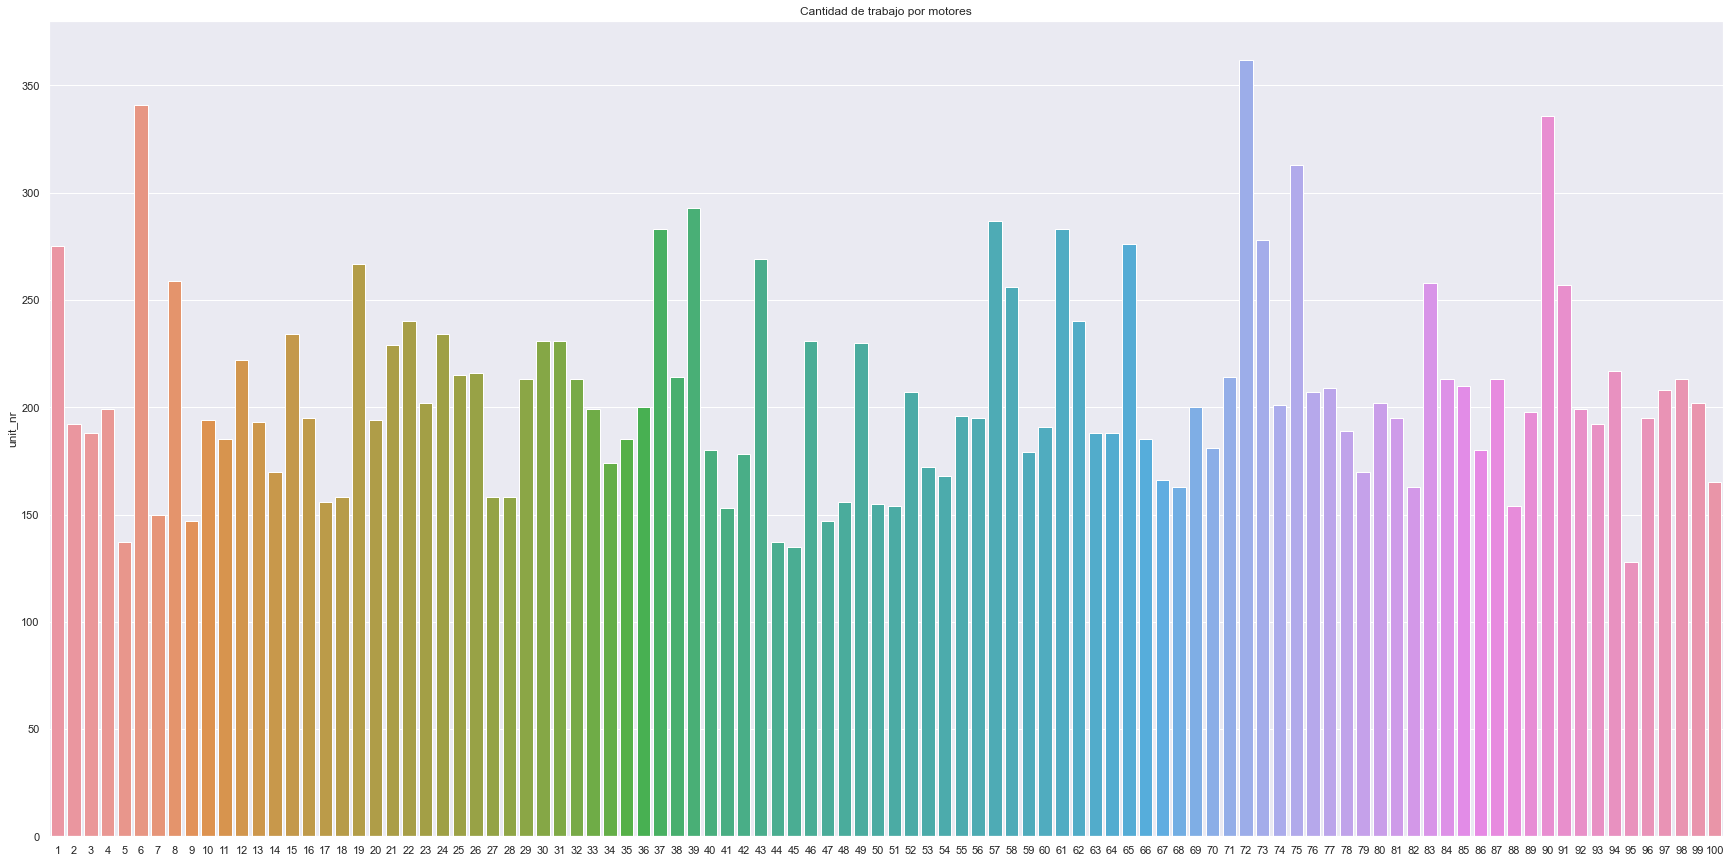

In [13]:
visualize.plot_work_by_motor(df)

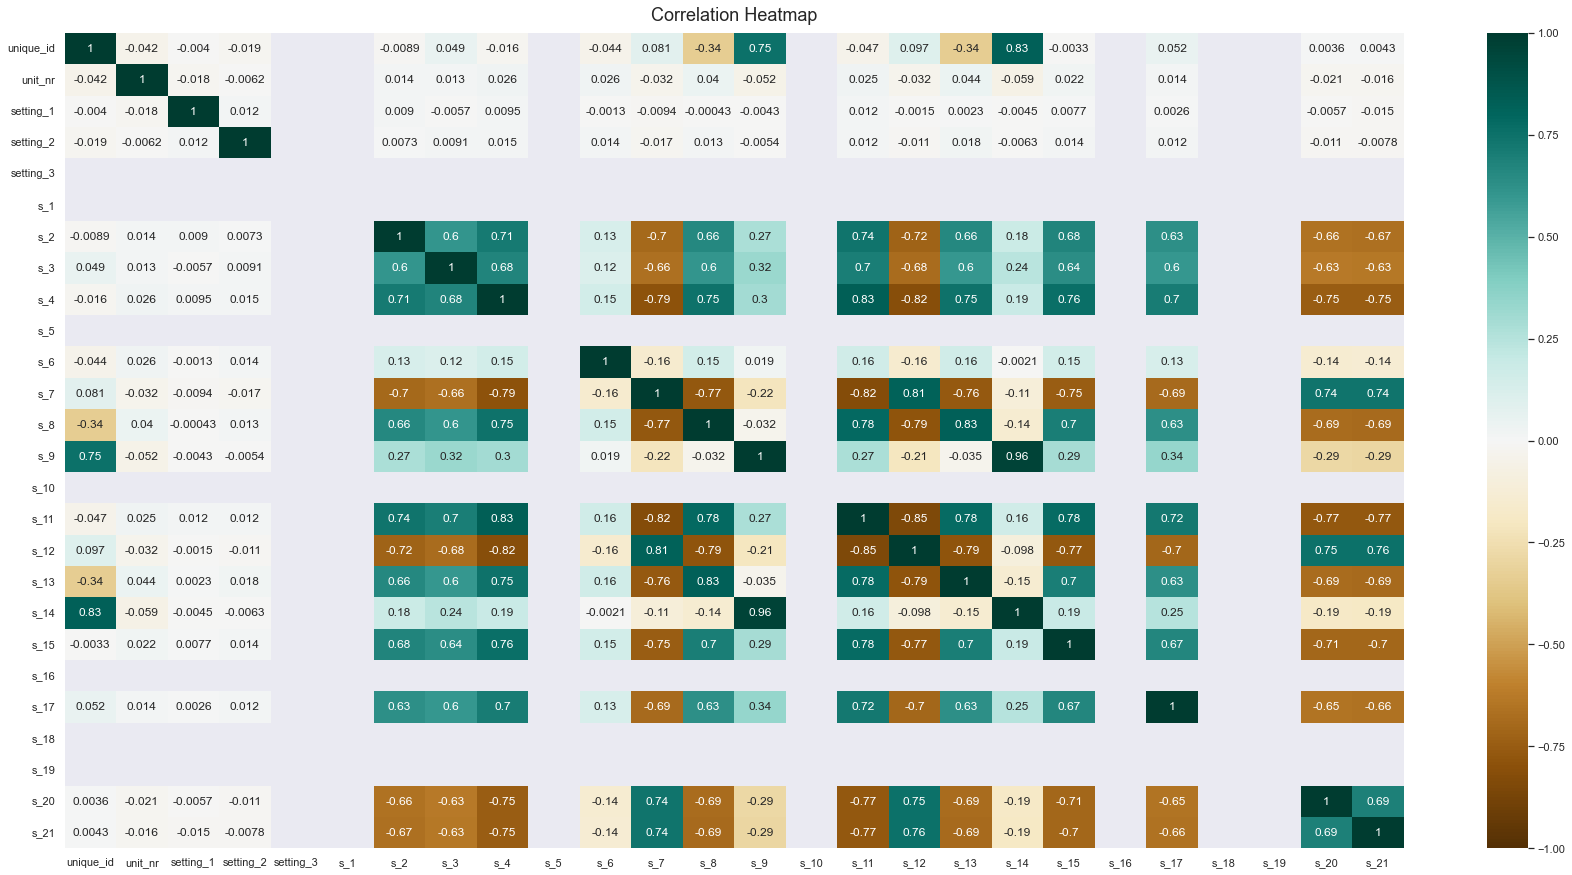

In [14]:
visualize.plot_correlation_heatmap(df)

### Transform and Modeling

In [15]:
### DATOS DE MUESTRA ###
#Se selecciona unos datos al azar para posteriormente verificar el clúster al que pertenecen
start = 0   # incluido
end = len(df)    # exclusivo 
n = 4      # size
indices = np.random.randint(low=start, high=end, size=(n))
print(indices)

[  810 10924 14394  3124]


In [16]:
muestras = pd.DataFrame(df.loc[indices],columns = df.keys()).reset_index(drop = True)
df = df.drop(indices, axis=0)

In [17]:
#Se realiza el escalamiento de los datos
from sklearn import preprocessing

In [18]:
data_escalada = preprocessing.Normalizer().fit_transform(df)
muestras_escalada = preprocessing.Normalizer().fit_transform(muestras)

In [19]:
### ANÁLISIS DE MACHINE LEARNING ###
from sklearn.cluster import KMeans

In [20]:
# Se determina las variables a evaluar
X = data_escalada.copy()

In [21]:
## Hallar el valor óptimo de K ##
# Se aplicará el método de codo para hallar  K
# Se calcula el algoritmo de agrupación para diferentes valores de K
inercia = []
for i in range(1,20):
    algoritmo = KMeans(n_clusters= i, init= 'k-means++', max_iter=300, n_init=10)
    algoritmo.fit(X)
    #Para cada K, se calcula la suma total del cuadrado dentro del clúster
    inercia.append(algoritmo.inertia_)

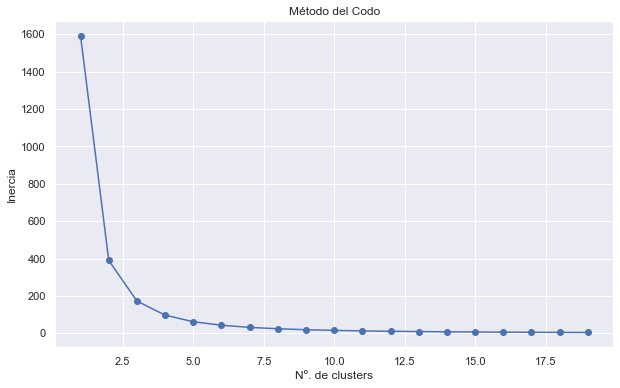

In [22]:
visualize.plot_elbow_method(inercia)

In [23]:
## Se aplica el algoritmo de clustering ##
# Se define el algoritmo junto con el valor de K
algoritmo = KMeans(n_clusters= 4, init='k-means++', max_iter=300, n_init=10)

In [24]:
# Se entrena el algoritmo
algoritmo.fit(X)

KMeans(n_clusters=4)

In [25]:
#Se obtiene los datos de los centroides y las etiquetas
centroides, etiquetas = algoritmo.cluster_centers_, algoritmo.labels_

In [26]:
#Utilicemos losd atos de muestras y verifiquemos en que cluster se encuentran
muestra_prediccion = algoritmo.predict(muestras_escalada)

In [27]:
for i, pred in enumerate(muestra_prediccion):
    print("Muestra", i, "se encuentra en el clúster:", pred)

Muestra 0 se encuentra en el clúster: 0
Muestra 1 se encuentra en el clúster: 1
Muestra 2 se encuentra en el clúster: 2
Muestra 3 se encuentra en el clúster: 0


In [28]:
### GRAFICAR LOS DATOS JUNTO A LOS RESULTADOS ###
# Se aplica la reducción de dimensionalidad a los datos
from sklearn.decomposition import PCA

In [29]:
modelo_pca = PCA(n_components=2)
modelo_pca.fit(X)
pca = modelo_pca.transform(X)

In [30]:
# Se aplica la reducción de dimensionalidad a los centroides
centroides_pca = modelo_pca.transform(centroides)

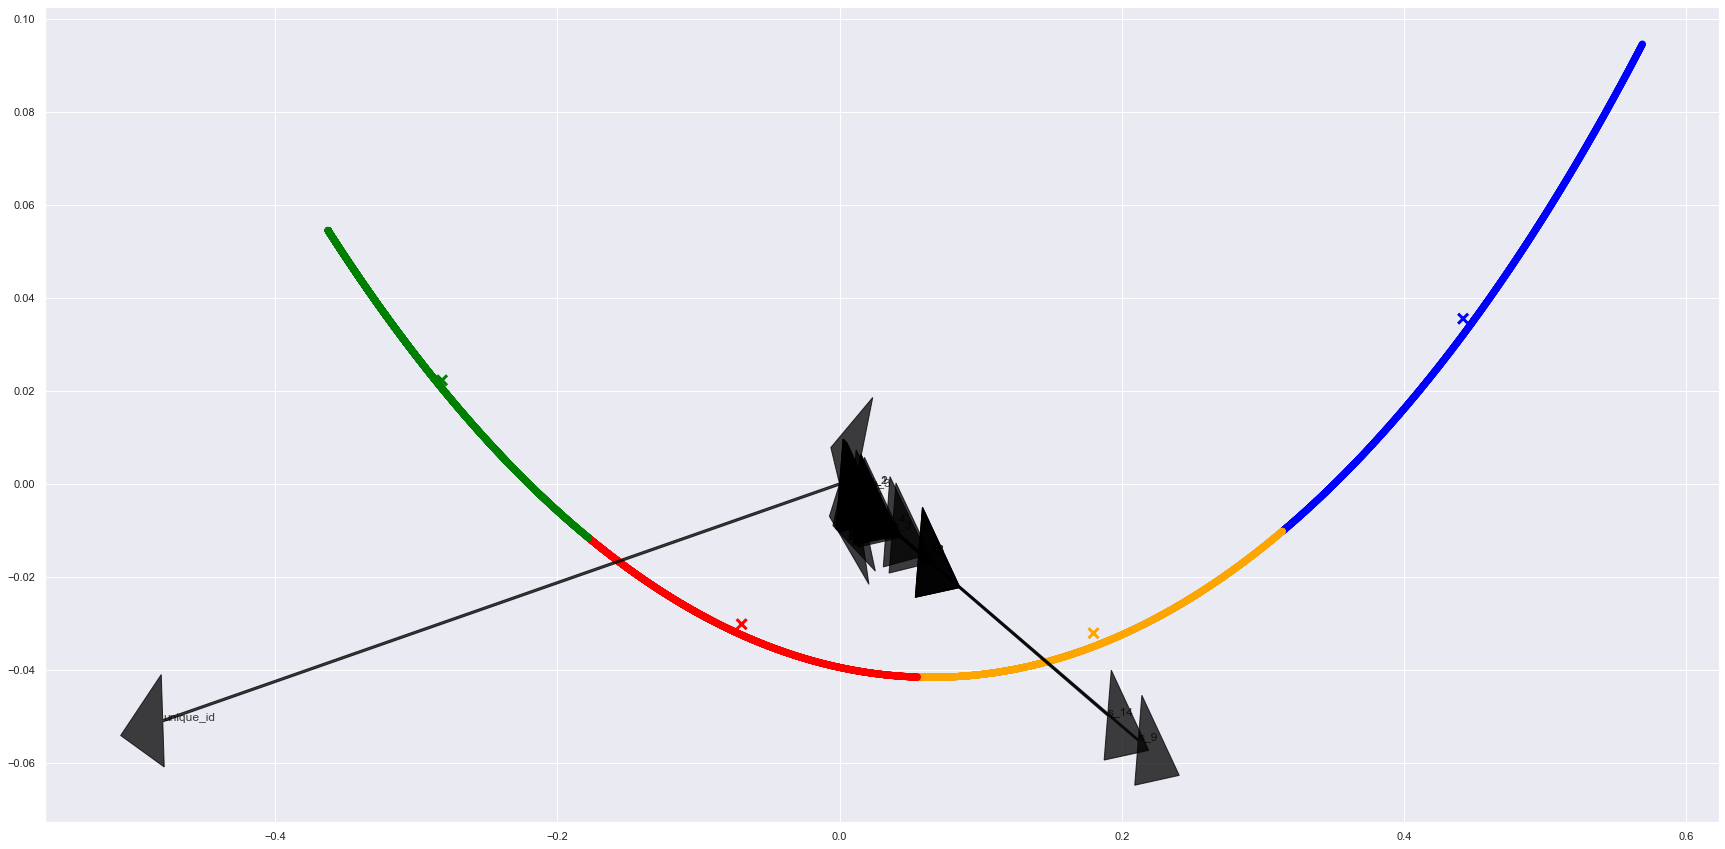

In [31]:
visualize.plot_result(pca, centroides_pca, modelo_pca, etiquetas,df)

### Conclusion

In [32]:
df_2 = pd.read_csv(input_data)

In [33]:
muestra_final = preprocessing.Normalizer().fit_transform(df_2)

In [34]:
muestra_final_prediccion = algoritmo.predict(muestra_final)

In [35]:
df_final = pd.DataFrame(columns=['unique_id','state'])

In [36]:
df_final['unique_id'] = df_2['unique_id']

In [37]:
df_final['state'] = muestra_final_prediccion

In [38]:
df_final['state'] = df_final['state'].map({0:'estado_1', 1:'estado_2',2:'estado_3',3:'estado_4'})

In [39]:
df_final

,unique_id,state
0,524,estado_1
1,525,estado_1
2,526,estado_1
3,527,estado_1
4,528,estado_1
...,...,...
20626,21150,estado_3
20627,21151,estado_3
20628,21152,estado_3
20629,21153,estado_3


In [40]:
resultado = path.data_processed_dir('resultados.csv')

In [41]:
df_final.to_csv(resultado, index=False)